# Regression with Python
General Docs: https://scikit-learn.org/stable/<br/>
Linear Regression Docs: https://scikit-learn.org/stable/modules/linear_model.html

The package scikit-learn is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. Like NumPy, scikit-learn is also open source.

Linear regression is one of the fundamental statistical and machine learning techniques. Whether you want to do statistics, machine learning, or scientific computing, there are good chances that you’ll need it. It’s advisable to learn it first and then proceed towards more complex methods.

## Regression vs. Classification

Two major types of problems that machine learning algorithms try to solve are:<br/>

Regression — Predict continuous value of a given data point<br/>
Classification — Predict the class of the given data point<br/>

### Example:

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
%pwd

'C:\\Users\\Payman\\Documents\\Python Scripts\\Session 7'

In [43]:
import pandas as pd
titanic = pd.read_csv('titanic(2).csv')
titanic.head()

,Pid,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8,NaN,S


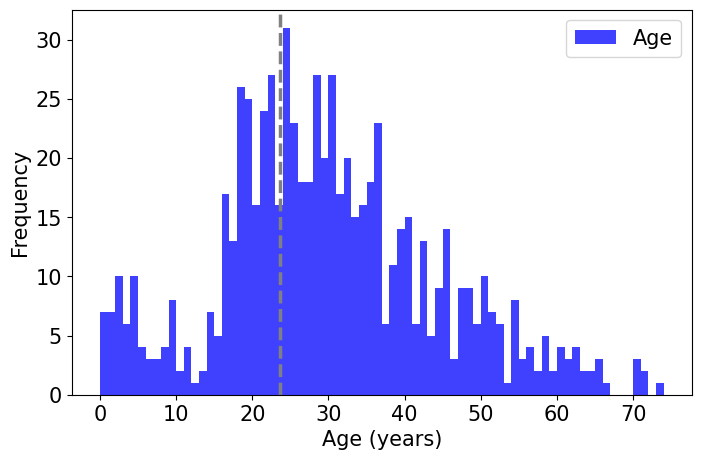

In [44]:
# Plot sizing
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

# Histogram
plt.hist(titanic['Age'], bins= range(75), color ='blue', label='Age', alpha = .75)
plt.axvline(x = titanic['Age'].mean(), ymin = 0, color='gray', linestyle = '--', linewidth = 2.5) # Add mean line

# naming the y axis
plt.ylabel('Frequency', fontsize= 15)
plt.yticks(fontsize=15)
# naming the x axis
plt.xlabel('Age (years)', fontsize= 15)
plt.xticks(fontsize = 15)
plt.legend(loc='best', fontsize = 15, markerscale = 10)

# plt.savefig('./figures/Age_hist.pdf', dpi= 1000)

plt.show()

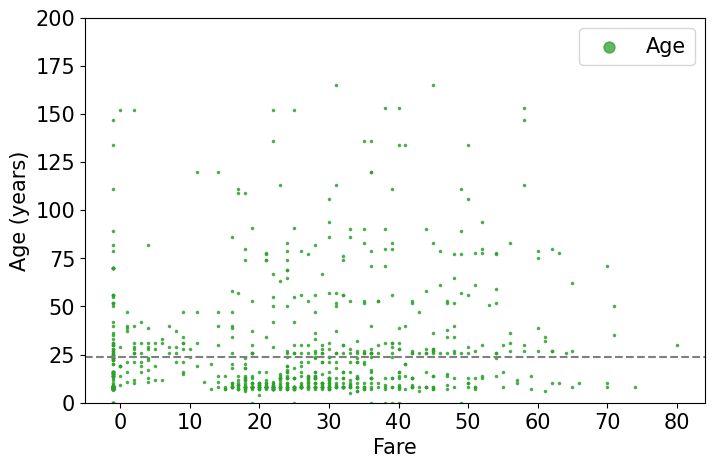

In [45]:
# Plot sizing
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

# Scatter
plt.scatter(titanic['Age'], titanic['Fare'], color ='Tab:green', s = 2.5, label='Age', alpha = .75)
plt.axhline(y = titanic['Age'].mean(), xmin = 0, color='Tab:gray', linestyle = '--') # Add mean line
plt.ylim(0,200)
# naming the y axis
plt.ylabel('Age (years)', fontsize= 15)
plt.yticks(fontsize=15)
# naming the x axis
plt.xlabel('Fare', fontsize= 15)
plt.xticks(fontsize = 15)
plt.legend(loc='best', fontsize = 15, markerscale = 5)

plt.savefig('Age vs Fare.pdf', dpi= 1000)

plt.show()

Classification Problem: Given all the other factors (i.e. features), predict whether a passenger was male or female.<br/>
Regression Problem: Given all the other factors (i.e. features), predict the age of a passenger.

## Linear Regression

Linear Regression, intuitively is a regression algorithm with a Linear approach. We try to predict a continuous value of a given data point by generalizing on the data that we have in hand. The linear part indicates that we are using a linear approach in generalizing over the data.

Problem: Given any house size, predict the house price.

This problem can be solved using a simple regression.<br/>
Simple regression refers to single variate regression.<br/>

**Predictor** (regressor, independent variable or explanatory variable or feature): house size.<br/>
**Responce Variable** (dependent variable or observation): house price.<br/>

Thus, **simple regression** refers to the prediction problem case where there is a single predictor.<br/>

The problem is to find the best fit line which generalizes over the data well.

#### Modeling

House Price = (Parameter)\*(House Size)<br/>
House Price = Constant + (Parameter)\*(House Size)<br/>
House Price = Constant + (Parameter)\*(House Size) + Error

Think of considering other predictors (i.e regressors, features, independent variables or explanatory variables) such as the size of the distance of the house to the school district, the size of the backyard, the size of the kitchen. We could keep adding these predictors in into the formulation: <br/>

House Price = Constant + (Parameter1)\*(House Size) + (Parameter2)\*(Distance to School District) + (Parameter3)\*(Kitchen Size) + (Parameter4)\*(House Size) + Error


This is a **multiple regression problem** which refers to the prediction problem case where there are multiple predictors.

Here the problem boils down to estimating parameters (i.e. each predictor's weight) so that the regression best represents the responce variable given the data, which is calling "Model Fitting".

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with $\beta_0, \beta_1, \beta_2, … \beta_n$. 

They define the estimated regression function $𝑓(𝐱) = Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 … + \beta_n x_n$. 

This function should capture the dependencies between the inputs and output sufficiently well.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the residuals. Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛:<br/> 
$$SSR =\Sigma^n_{i=1}(y_i – f(x_i))^2$$ 

This approach is called the minimumum least squares method.

In many cases, the model fitting precedure tries to mimize SSR, which ensures that the final regression is close to all observations (i.e. predictors). 

Think of the simple regression line, which passes through in the middle of the observations.

## Quality of Fit
### Coefficient of Determination ($R^2$)
A common method of measuring the accuracy of regression models is to use the $R^2$ statistic. It is defined as:<br/>
$$R^2 = 1 – \dfrac{SSR}{TSS}$$
The SSR (sum of squares of residuals) measures the variability left unexplained after performing the regression<br/>
The TSS (total sum of squares) measues the total variance in Y<br/>
Therefore the R2 statistic measures proportion of variability in Y that is explained by X using our model

### Prediction Accuracy Metrics

The performance of the model can be evaluated through some accuracy metrics. 
 
Mean Absolute Error: $MAE = \frac{1}{n}\Sigma^n_{i=1}(|y_i – f(x_i)|)$<br/>
Mean Squared Error: $MSE = \frac{1}{n}\Sigma^n_{i=1}(y_i – f(x_i))^2 $ <br/>
Root Mean Squared Error: $RMSE = \sqrt{MSE}$ <br/>

These metrics can be estimated over:<br/> 
1) training period (**in-sampling errors**) or<br/>
2) testing period (**out-of-sampling errors**).

Evaluating the performance of a model is a lot more common through out-of-sampling errors. But it requires a testing sample set.

### Example - Simple Linear Regression

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

Now we have all the functionalities you need to implement linear regression.

The fundamental data type of NumPy is the array type called numpy.ndarray. 

The class sklearn.linear_model.LinearRegression will be used to perform linear regression and make predictions accordingly.

In [47]:
house_size = np.array(
   [[500],
    [1500],
    [2500],
    [3500],
    [4500],
    [5500]])

house_price = np.array([50000,200000,140000,320000,220000,380000])

Now, you have two arrays: the input x and output y. The array is required to be two-dimensional.

In this case, one column and as many rows as necessary. 

In [48]:
print(house_size)

[[ 500]
 [1500]
 [2500]
 [3500]
 [4500]
 [5500]]


In [49]:
print(house_price)

[ 50000 200000 140000 320000 220000 380000]


As you can see, house_size has two dimensions, while house_price has a single dimension

The next step is to create a linear regression model and fit it using the existing data.

Let’s create an instance of the class LinearRegression, which will represent the regression model:

Let's take a look at the data in a scatter plot.

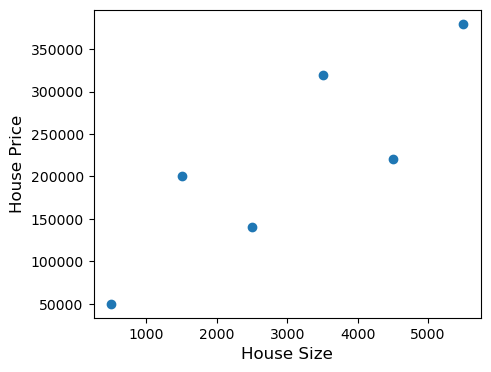

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(house_size, house_price)
plt.ylabel('House Price', size=12)
plt.xlabel('House Size', size=12)
plt.show()

In [51]:
my_regression_model = LinearRegression()

First, you need to call `.fit()` on model:

In [52]:
my_regression_model.fit(house_size, house_price)

LinearRegression()

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing predictor and response (house_size and house_price) as the arguments. 

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (𝑅²) with .score() called on model.

𝑅² is a statistic that will give some information about the goodness of fit of a model. 𝑅² = 1 indicates that the regression predictions perfectly fit the data.

In [53]:
R2 = my_regression_model.score(house_size, house_price)

print('Coefficient of determination:', R2)

Coefficient of determination: 0.715875613747954


Let's evaluate the fitting quality. 

When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

The attributes of model are `.intercept_`, which represents the coefficient, 𝑏₀ and `.coef_`, which represents 𝑏₁:

In [54]:
print(my_regression_model.intercept_)

56333.33333333337


In [55]:
print(my_regression_model.coef_)

[54.]


Regression model:<br/>
house_price = 56333.3 + 54\*house_size

We can use the model for predictions with either existing or new data.

Let's predict the existing data (the house prices available in the data)

In [56]:
house_price_pred = my_regression_model.intercept_ + my_regression_model.coef_ * house_size

print(house_price_pred)

[[ 83333.33333333]
 [137333.33333333]
 [191333.33333333]
 [245333.33333333]
 [299333.33333333]
 [353333.33333333]]


To obtain the predicted response, use `.predict()`.

In [57]:
house_price_pred = my_regression_model.predict(house_size)

print(house_price_pred)

[ 83333.33333333 137333.33333333 191333.33333333 245333.33333333
 299333.33333333 353333.33333333]


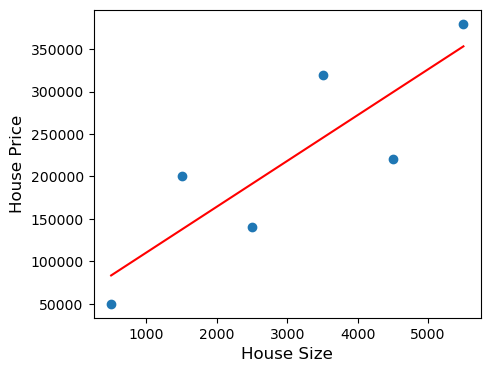

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(house_size, house_price)
plt.ylabel('House Price', size=12)
plt.xlabel('House Size', size=12)
plt.plot(house_size, house_price_pred, color='r')
plt.show()

Let's evaluate the fit quality through in-sample-errors

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(house_price, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(house_price, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(house_price, house_price_pred)))

Mean Absolute Error: 54666.66666666668
Mean Squared Error: 3375555555.555557
Root Mean Squared Error: 58099.53145728076


#### How can we improve these results (i.e. reduce errors)?
**More data:** Only the data with six observations isn't that much. More data points would improve the accuracy quite a bit.

**Modeling strategy:** We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that. Perhaps we should go with a different modeling strategy. 

**Poor features or lack of features (i.e. predictors):** In this case we are seeing a single feature which is house size. There a high enough correlation to the values we were trying to predict. Perhaps adding additional features might imrove the predictions.

Let's create predictions with the new data.

In [60]:
new_house_size = np.array([[5500], [6000], [7000], [8000]])

house_price_pred_more = my_regression_model.predict(new_house_size)

print(house_price_pred_more)

[353333.33333333 380333.33333333 434333.33333333 488333.33333333]


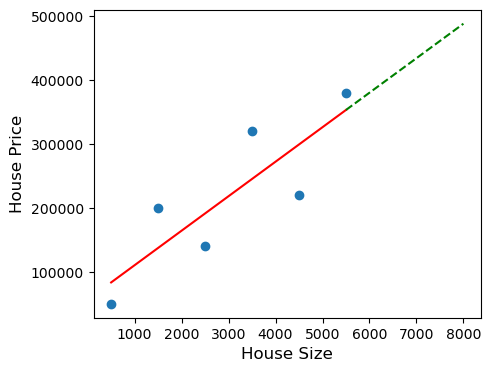

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(house_size, house_price)
plt.ylabel('House Price', size=12)
plt.xlabel('House Size', size=12)
plt.plot(house_size, house_price_pred, color='r')
plt.plot(new_house_size, house_price_pred_more, color='green', linestyle='dashed')
plt.show()

### Example - Multiple Linear Regression

Let's consider kitchen size as another predictor along with house size. <br/>
We will create a two dimentional matrix called "features" to hold both predictors.

In [62]:
features = house_size = np.array(
   [[500, 40],
    [1500, 100],
    [2500, 200],
    [3500, 220],
    [4500, 250],
    [5500, 300]])

house_price = np.array([50000,200000,140000,320000,220000,380000])

In [63]:
my_regression_model = LinearRegression()

In [64]:
my_regression_model.fit(features, house_price)

LinearRegression()

In [65]:
my_regression_model.score(features, house_price)

0.7190840946997956

The new coefficient of determination value indicates that the fitting quality definitely improved from 0.715 to 0.719.

In [66]:
my_regression_model.intercept_

66620.92283214012

In [67]:
my_regression_model.coef_

array([  69.6300716 , -309.06921241])

Regression model:<br/>
house_price = 66620.9 + 69.6\*house_size + (-309.0)\*kitchen_size


$y = 66620.9 + 69.6x_1 - 309x_2$

In [69]:
house_price_pred = my_regression_model.intercept_ + my_regression_model.coef_ [0]* features[:,0] + my_regression_model.coef_ [1]* features[:,1]

print(house_price_pred)

[ 89073.19013524 140159.10898966 178882.25934765 242330.94669849
 302688.94192522 356865.55290374]


In [70]:
my_regression_model.predict(features)

array([ 89073.19013524, 140159.10898966, 178882.25934765, 242330.94669849,
       302688.94192522, 356865.55290374])

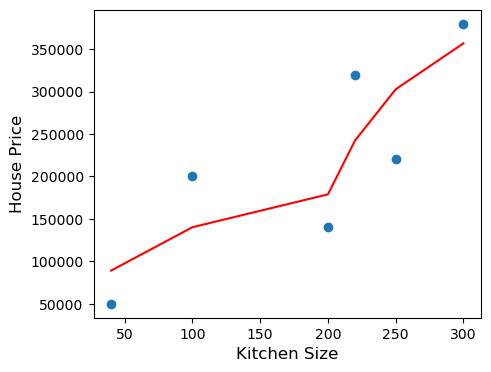

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
kitchen_size = features[:,1]
plt.scatter(kitchen_size, house_price)
plt.ylabel('House Price', size=12)
plt.xlabel('Kitchen Size', size=12)
plt.plot(kitchen_size, house_price_pred, color='r')
plt.show()

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(house_price, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(house_price, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(house_price, house_price_pred)))

Mean Absolute Error: 53548.13046937153
Mean Squared Error: 3337437019.3582606
Root Mean Squared Error: 57770.554951101694


Notice that addition of the new feature (kitchen size) reduced all error results (i.e. better fit).

Let's create predictions with the new data.

In [75]:
new_data = np.array([[5500, 310], [6000, 315], [7000, 325], [8000, 340]])

house_price_pred_more = my_regression_model.predict(new_data)

print(house_price_pred_more)

[353774.86077963 387044.5505171  453583.92999204 518577.96340493]


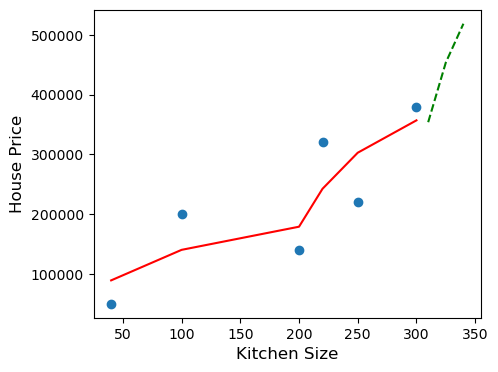

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
kitchen_size = features[:,1]
plt.scatter(kitchen_size, house_price)
plt.ylabel('House Price', size=12)
plt.xlabel('Kitchen Size', size=12)
plt.plot(kitchen_size, house_price_pred, color='r')
new_kitchen_size_data = new_data[:,1]
plt.plot(new_kitchen_size_data, house_price_pred_more, color='green', linestyle='dashed')
plt.show()

### Measuring Quality of Fit over Out-of-Sample Errors

In [79]:
features

array([[ 500,   40],
       [1500,  100],
       [2500,  200],
       [3500,  220],
       [4500,  250],
       [5500,  300]])

In [80]:
0.2*6

1.2000000000000002

In [77]:
from sklearn.model_selection import train_test_split
features_train, features_test, house_price_train, house_price_test = train_test_split(features, house_price, test_size=0.2, random_state=0)
# features_ttrain, features_val, house_price_ttrain, house_price_val = train_test_split(features_train, house_price_train, test_size=0.2, random_state=0)


In [78]:
print('Train data\n', features_train)
print()
print('Test data\n', features_test)

Train data
 [[1500  100]
 [3500  220]
 [ 500   40]
 [4500  250]]

Test data
 [[5500  300]
 [2500  200]]


In [81]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, house_price_train)

LinearRegression()

Now let's create prediction over the test data set.

In [82]:
house_price_pred = my_regression_model.predict(features_test)

Now let's evaluate the model performance over test data.

In [83]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(house_price_test, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(house_price_test, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(house_price_test, house_price_pred)))

Mean Absolute Error: 31008.353221957048
Mean Squared Error: 1023516367.2139283
Root Mean Squared Error: 31992.442345246607
